In [1]:
#CSV Bibliothek importieren 
import csv
#Pandas importieren und als pd bezeichnen
import pandas as pd
#Numpy importieren und als np bezeichnen 
import numpy as np
#Json Biliothek importieren
import json
#Obere Schranke für die Größe der Daten auf 100,000,000 setzen  
csv.field_size_limit(100000000)
#Maximale Anzahl von Zeilen und Spalten Zeigen 
pd.options.display.max_columns = None
pd.options.display.max_rows = None
#Um die Zeiträume bearbeiten zu können
from datetime import datetime
#Seaborn für die Plot importieren
import seaborn as sns
#matplotlib Importieren und als plt bezeichnen
import matplotlib.pyplot as plt
#Macht die Plots inline
%matplotlib inline 
#dates importieren, um Zeitstempel bearbeiten zu können
import matplotlib.dates as mdates
#tick importieren
import matplotlib.ticker as tick
#Die Nachkommastellen auf 4 Zashlen einschränken
pd.options.display.float_format = '{:.4f}'.format

import matplotlib.ticker                         # here's where the formatter is
from matplotlib.ticker import ScalarFormatter
from matplotlib import ticker

import warnings
warnings.filterwarnings("ignore")

***

# TweetsCov19
## KDE-Plot

***

In [54]:
path = '../data/tweetsCov19_polarized_users_and_tweets_deletionratio_reputation.tsv'

df_u_t = pd.read_csv(path, sep='\t', error_bad_lines=False, names=['Tweet_Id', 'Username', 'Deletionratio', 'Reputation', 'is_deleted', 'user_political_polarisation', 'user_science_polarisation', 'user_moderacy_polarisation', 'tweet_political_polarisation', 'tweet_science_polarisation', 'tweet_moderacy_polarisation'])

print('Shape :', df_u_t.shape)
df_u_t.head()

Shape : (2231354, 11)


,Tweet_Id,Username,Deletionratio,Reputation,is_deleted,user_political_polarisation,user_science_polarisation,user_moderacy_polarisation,tweet_political_polarisation,tweet_science_polarisation,tweet_moderacy_polarisation
0,1178791643509612547,7966d5716c1c4f33591b17755184e3d6,0.2083,0.5722,False,-0.5000,0.0000,-1.0000,0.0000,0.0000,0.0000
1,1179408833728466944,7966d5716c1c4f33591b17755184e3d6,0.2083,0.5722,True,-0.5000,0.0000,-1.0000,0.0000,0.0000,0.0000
2,1182683474827739136,7966d5716c1c4f33591b17755184e3d6,0.2083,0.5722,False,-0.5000,0.0000,-1.0000,0.0000,0.0000,0.0000
3,1184746364158271488,7966d5716c1c4f33591b17755184e3d6,0.2083,0.5722,False,-0.5000,0.0000,-1.0000,-1.0000,0.0000,-1.0000
4,1185117204628623360,7966d5716c1c4f33591b17755184e3d6,0.2083,0.5722,True,-0.5000,0.0000,-1.0000,0.0000,0.0000,0.0000


In [55]:
df_tweetscov19_political_polarized_user = df_tweetscov19_political_polarized_user[['Username','user_political_polarisation']]
df_u_t = df_u_t[['Tweet_Id', 'tweet_political_polarisation', 'Username', 'Reputation', 'is_deleted']]

df_tweetscov19 =  pd.merge(df_u_t, df_tweetscov19_political_polarized_user, on = 'Username', how='inner')
df_tweetscov19.shape

(2057978, 6)

In [62]:
df_tweetscov19.tweet_political_polarisation.isna().sum()

0

In [2]:
path = '../data/tweetscov19_political_polarized_useres.tsv'

df_tweetscov19_political_polarized_user = pd.read_csv(path, sep='\t', error_bad_lines=False, names=['Username', 'Number_of_liberals', 'Number_of_conservatives', 'Sum_polarised_domains', 'user_political_polarisation'])

print('Shape :', df_tweetscov19_political_polarized_user.shape)
df_tweetscov19_political_polarized_user.head()

Shape : (176301, 5)


,Username,Number_of_liberals,Number_of_conservatives,Sum_polarised_domains,user_political_polarisation
0,00008ca06f863b962f72cc9167d7978a,-1,0,1,-1.0000
1,00008de3f61d5f04329ee6867d5475b9,-1,0,1,-1.0000
2,00012a177385cd6e7590e2acb3f206e3,-1,0,1,-1.0000
3,00016e20a3865cb74581803c27d27b89,-1,0,1,-1.0000
4,000186b796b0eb667801aad27ca978eb,-2,0,2,-1.0000


In [3]:
path = '../data/tweetscov19_political_polarized_tweets.tsv'

df_tweetscov19_political_polarized_tweets = pd.read_csv(path, sep='\t', error_bad_lines=False, names=['Tweet_Id', 'Number_of_liberals', 'Number_of_conservatives', 'Sum_polarized_domains', 'tweet_political_polarisation'])

print('Shape :', df_tweetscov19_political_polarized_tweets.shape)
df_tweetscov19_political_polarized_tweets.head()

Shape : (611835, 5)


,Tweet_Id,Number_of_liberals,Number_of_conservatives,Sum_polarized_domains,tweet_political_polarisation
0,1178791675315011589,-1,0,1,-1.0000
1,1178791745447968768,-1,0,1,-1.0000
2,1178791856890503170,-1,0,1,-1.0000
3,1178791939728130048,-1,0,1,-1.0000
4,1178791946413846529,-1,0,1,-1.0000


In [4]:
pfad_tsv = '../data/TweetsCov19_alltweets_reputation_deletionratio.tsv'

df_tweetscov19_alltweets_reputation_deletionratio = pd.read_csv(pfad_tsv, sep='\t', error_bad_lines=False, names=['Tweet_Id', 'Username', 'Followers', 'Friends', 'is_deleted', 'Reputation', 'num_posted', 'num_deleted', 'Deletionratio'])

print('Form :', df_tweetscov19_alltweets_reputation_deletionratio.shape)
df_tweetscov19_alltweets_reputation_deletionratio.head()

Form : (9409841, 9)


,Tweet_Id,Username,Followers,Friends,is_deleted,Reputation,num_posted,num_deleted,Deletionratio
0,1178791637348212736,c57d4fb895c5f4a33d2a2b24709f93b5,764191,132,True,0.9998,21,21,1.0000
1,1181705842275573766,c57d4fb895c5f4a33d2a2b24709f93b5,765034,132,True,0.9998,21,21,1.0000
2,1187828746503540738,c57d4fb895c5f4a33d2a2b24709f93b5,766578,132,True,0.9998,21,21,1.0000
3,1192622772658290688,c57d4fb895c5f4a33d2a2b24709f93b5,767939,133,True,0.9998,21,21,1.0000
4,1193272068621717504,c57d4fb895c5f4a33d2a2b24709f93b5,768180,133,True,0.9998,21,21,1.0000


In [5]:
df_tweetscov19_political_polarized_user = df_tweetscov19_political_polarized_user[['Username','user_political_polarisation']]
df_tweetscov19_political_polarized_tweets = df_tweetscov19_political_polarized_tweets[['Tweet_Id', 'tweet_political_polarisation']]

df_tweetscov19 =  pd.merge(df_tweetscov19_alltweets_reputation_deletionratio, df_tweetscov19_political_polarized_user, on = 'Username', how='inner')
df_tweetscov19.shape

(2057978, 10)

In [6]:
df_tweetscov19 = pd.merge(df_tweetscov19, df_tweetscov19_political_polarized_tweets, on='Tweet_Id', how='inner')
df_tweetscov19.shape

(611835, 11)

In [7]:
df_tweetscov19.Username.unique().size

176301

In [8]:
df_tweetscov19[df_tweetscov19.tweet_political_polarisation == 0].shape

(189, 11)

In [9]:
df_tweetscov19[df_tweetscov19.tweet_political_polarisation > 0].shape

(140556, 11)

***

In [3]:
path = '../data/df_tweetscov19_october2019_political_polarized_useres.tsv'
October = pd.read_csv(path, sep='\t', error_bad_lines=False, names=['Username', 'Number_of_liberals', 'Number_of_conservatives', 'Sum_polarised_domains', 'politic'])
print('October: ', '{0:.3g}'.format(October.politic.mean()))

path = '../data/df_tweetscov19_november2019_political_polarized_useres.tsv'
November = pd.read_csv(path, sep='\t', error_bad_lines=False, names=['Username', 'Number_of_liberals', 'Number_of_conservatives', 'Sum_polarised_domains', 'politic'])
print('November: ', '{0:.3g}'.format(November.politic.mean()))

path = '../data/df_tweetscov19_december2019_political_polarized_useres.tsv'
December = pd.read_csv(path, sep='\t', error_bad_lines=False, names=['Username', 'Number_of_liberals', 'Number_of_conservatives', 'Sum_polarised_domains', 'politic'])
print('December: ', '{0:.3g}'.format(December.politic.mean()))

path = '../data/df_tweetscov19_januar2020_political_polarized_useres.tsv'
Januar = pd.read_csv(path, sep='\t', error_bad_lines=False, names=['Username', 'Number_of_liberals', 'Number_of_conservatives', 'Sum_polarised_domains', 'politic'])
print('Januar: ', '{0:.3g}'.format(Januar.politic.mean()))

path = '../data/df_tweetscov19_februar2020_political_polarized_useres.tsv'
Februar = pd.read_csv(path, sep='\t', error_bad_lines=False, names=['Username', 'Number_of_liberals', 'Number_of_conservatives', 'Sum_polarised_domains', 'politic'])
print('February: ', '{0:.3g}'.format(Februar.politic.mean()))

path = '../data/df_tweetscov19_maerz2020_political_polarized_useres.tsv'
March = pd.read_csv(path, sep='\t', error_bad_lines=False, names=['Username', 'Number_of_liberals', 'Number_of_conservatives', 'Sum_polarised_domains', 'politic'])
print('March: ', '{0:.3g}'.format(March.politic.mean()))

path = '../data/df_tweetscov19_April2020_political_polarized_useres.tsv'
April = pd.read_csv(path, sep='\t', error_bad_lines=False, names=['Username', 'Number_of_liberals', 'Number_of_conservatives', 'Sum_polarised_domains', 'politic'])
print('April: ', '{0:.3g}'.format(April.politic.mean()))

path = '../data/df_tweetscov19_mai2020_political_polarized_useres.tsv'
Mai = pd.read_csv(path, sep='\t', error_bad_lines=False, names=['Username', 'Number_of_liberals', 'Number_of_conservatives', 'Sum_polarised_domains', 'politic'])
print('Mai: ', '{0:.3g}'.format(Mai.politic.mean()))


October:  -0.497
November:  -0.515
December:  -0.504
Januar:  -0.527
February:  -0.527
March:  -0.582
April:  -0.524
Mai:  -0.5


***

****

In [10]:
print('Alle Users:', df_tweetscov19.Username.unique().size)

Alle Users: 176301


In [17]:
# df_tweetscov19 = df_tweetscov19[df_tweetscov19['politic'] != 0]

# print('Shape: ', df_tweetscov19.shape)
# df_tweetscov19.head()

In [11]:
df_tweetscov19_del = df_tweetscov19[df_tweetscov19['is_deleted']==True]
df_tweetscov19_undel = df_tweetscov19[df_tweetscov19['is_deleted']==False]

In [12]:
print('Deleted Tweets:', df_tweetscov19_del.shape)
print('Non-deleted Tweets:', df_tweetscov19_undel.shape)


Deleted Tweets: (73183, 11)
Non-deleted Tweets: (538652, 11)


In [13]:
print('Alle Users:', df_tweetscov19.Username.unique().size)

df = df_tweetscov19[df_tweetscov19['user_political_polarisation']>0]
print('Alle kon. Users in gesammten Tweets:', df.Username.unique().size)
print('Tweets of kon. Users in gesammten Tweets:', df.shape[0])

df = df_tweetscov19[df_tweetscov19['user_political_polarisation']<0]
print('Alle lib. Users in gesammten Tweets:', df.Username.unique().size)
print('Tweets of lib. Users in gesammten Tweets:', df.shape[0])

Alle Users: 176301
Alle kon. Users in gesammten Tweets: 36179
Tweets of kon. Users in gesammten Tweets: 124791
Alle lib. Users in gesammten Tweets: 135174
Tweets of lib. Users in gesammten Tweets: 474624


In [14]:
print('Alle Users:', df_tweetscov19_del.Username.unique().size)
print('Number of deleted Tweets:', df_tweetscov19_del.shape)
df = df_tweetscov19_del[df_tweetscov19_del['user_political_polarisation']>0]
print('Alle kon. Users in gelöschten Tweets:', df.Username.unique().size)
print('Tweets of kon. Users in gelöschten Tweets:', df.shape[0])


df = df_tweetscov19_del[df_tweetscov19_del['user_political_polarisation']<0]
print('Alle lib. Users in gelöschten Tweets:', df.Username.unique().size)
print('Tweets of lib. Users in gelöschten Tweets:', df.shape[0])

Alle Users: 30765
Number of deleted Tweets: (73183, 11)
Alle kon. Users in gelöschten Tweets: 9140
Tweets of kon. Users in gelöschten Tweets: 27901
Alle lib. Users in gelöschten Tweets: 20569
Tweets of lib. Users in gelöschten Tweets: 42849


In [15]:
print('Alle Users:', df_tweetscov19_undel.Username.unique().size)
print('Number of undeleted Tweets:', df_tweetscov19_undel.shape)

df = df_tweetscov19_undel[df_tweetscov19_undel['user_political_polarisation']>0]
print('Alle kon. Users in nicht gelöschten Tweets:', df.Username.unique().size)
print('Tweets of kon. Users in nicht gelöschten Tweets:', df.shape[0])

df = df_tweetscov19_undel[df_tweetscov19_undel['user_political_polarisation']<0]
print('Alle lib. Users in nicht gelöschten Tweets:', df.Username.unique().size)
print('Tweets of lib. Users in nicht gelöschten Tweets:', df.shape[0])

Alle Users: 148488
Number of undeleted Tweets: (538652, 11)
Alle kon. Users in nicht gelöschten Tweets: 27627
Tweets of kon. Users in nicht gelöschten Tweets: 96890
Alle lib. Users in nicht gelöschten Tweets: 116808
Tweets of lib. Users in nicht gelöschten Tweets: 431775


In [16]:
df_tweetscov19_neutral = df_tweetscov19[df_tweetscov19['user_political_polarisation']==0]
print('Alle Users:', df_tweetscov19_neutral.Username.unique().size)

df = df_tweetscov19_del[df_tweetscov19_del['user_political_polarisation']==0]
print('Alle neutral Users in gelöschten Tweets:', df.Username.unique().size)
print('Tweets of neutral Users in gelöschten Tweets:', df.shape[0])

df = df_tweetscov19_undel[df_tweetscov19_undel['user_political_polarisation']==0]
print('Alle neutral Users in nicht gelöschten Tweets:', df.Username.unique().size)
print('Tweets of neutral Users in nicht gelöschten Tweets:', df.shape[0])

Alle Users: 4948
Alle neutral Users in gelöschten Tweets: 1056
Tweets of neutral Users in gelöschten Tweets: 2433
Alle neutral Users in nicht gelöschten Tweets: 4053
Tweets of neutral Users in nicht gelöschten Tweets: 9987


In [21]:
def plot_kdeplot_v1(df, hue, x, x_label, titel, name): 
    ax = sns.kdeplot(data=df, x=x, hue=hue, fill=True, legend= False)
    #ax = sns.kdeplot(data=df, x=x, hue=hue, multiple="fill")
    
    
    ax.set_ylabel(ylabel='Density', fontsize=15)
    ax.set_xlabel(xlabel=x_label, fontsize=17)

    ax.tick_params(axis='x', which='major', labelsize=16)
    ax.tick_params(axis='y', which='major', labelsize=15)

    plt.legend(labels = ['Deleted','Non-deleted'], bbox_to_anchor=(0.2, 1.13), ncol=2, loc=2, borderaxespad=0, fontsize=12)
    #g.set_title(titel, fontweight="bold")
    #plt.legend(labels = ['Deleted','Non-deleted'], bbox_to_anchor=(1.02, 1.), loc=2, borderaxespad=0)
    plt.tight_layout()
    #plt.savefig('../plots/'+name+'.pdf')


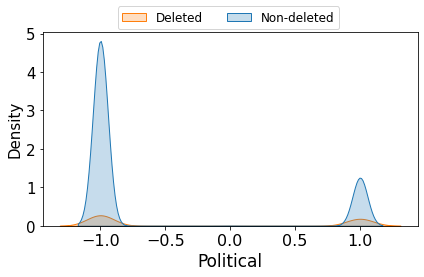

In [22]:
df = df_tweetscov19[['is_deleted', 'tweet_political_polarisation']]
plot_kdeplot_v1(df, 'is_deleted','tweet_political_polarisation' ,'Political' ,'TweetsCov19', 'kdeplot_tweetscov19_politic_all_tweets_conditionaldistribution')

In [17]:

def plot_kdeplot_v2(df, hue, x, x_label, titel, name):
    #sns.color_palette("RdPu", 10)
    ax = sns.kdeplot(data=df, x=x, hue=hue, multiple="fill")
    
    ax.set_title('Political', fontsize=22)
    ax.set_ylabel(ylabel='Density', fontsize=22)
    ax.set_xlabel(xlabel=x_label, fontsize=22)

    ax.tick_params(axis='x', which='major', labelsize=18)
    ax.tick_params(axis='y', which='major', labelsize=18)

    #plt.legend(labels = ['Deleted','Non-deleted'], bbox_to_anchor=(0.2, 1.13), ncol=2, loc=2, borderaxespad=0, fontsize=12)
    plt.legend([],[], frameon=False)
    plt.tight_layout()
#     plt.savefig('../plots/'+name+'.pdf')
    

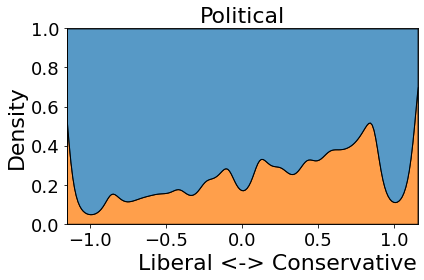

In [18]:
df = df_tweetscov19[['is_deleted', 'user_political_polarisation']]
plot_kdeplot_v2(df, 'is_deleted','user_political_polarisation' ,'          Liberal <-> Conservative' ,'TweetsCov19', 'kdeplot_tweetscov19_politic_all_tweets_Normalizethestackeddistribution')

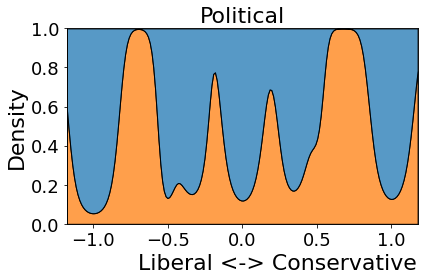

In [19]:
df = df_tweetscov19[['is_deleted', 'tweet_political_polarisation']]
plot_kdeplot_v2(df, 'is_deleted','tweet_political_polarisation' ,'          Liberal <-> Conservative' ,'TweetsCov19', 'kdeplot_tweetscov19_politic_all_tweets_Normalizethestackeddistribution')

In [20]:
def plot_kdeplot_v3(df, hue, x, x_label, titel, name): 
    #ax = sns.kdeplot(data=df, x=x, hue=hue, multiple="fill")
    ax = sns.kdeplot(
    data=df, x=x, hue=hue,
    cumulative=True, common_norm=False, common_grid=True,
    )
    
    ax.set_ylabel(ylabel='Density', fontsize=15)
    ax.set_xlabel(xlabel=x_label, fontsize=17)

    ax.tick_params(axis='x', which='major', labelsize=16)
    ax.tick_params(axis='y', which='major', labelsize=15)

    plt.legend(labels = ['Deleted','Non-deleted'], bbox_to_anchor=(0.2, 1.13), ncol=2, loc=2, borderaxespad=0, fontsize=12)
    #g.set_title(titel, fontweight="bold")
    #plt.legend(labels = ['Deleted','Non-deleted'], bbox_to_anchor=(1.02, 1.), loc=2, borderaxespad=0)
    plt.tight_layout()
    #plt.savefig('../plots/'+name+'.pdf')


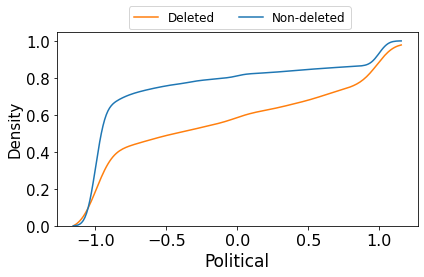

In [21]:
df = df_tweetscov19[['is_deleted', 'user_political_polarisation']]
plot_kdeplot_v3(df, 'is_deleted','user_political_polarisation' ,'Political' ,'TweetsCov19', 'kdeplot_tweetscov19_politic_all_tweets_cumulativedistributionfunction')

***

# Histogram

***

***

In [22]:
class MathTextSciFormatter(ticker.Formatter):
    def __init__(self, fmt="%1.2e"):
        self.fmt = fmt
    def __call__(self, x, pos=None):
        s = self.fmt % x
        decimal_point = '.'
        positive_sign = '+'
        tup = s.split('e')
        significand = tup[0].rstrip(decimal_point)
        sign = tup[1][0].replace(positive_sign, '')
        exponent = tup[1][1:].lstrip('0')
        if exponent:
            exponent = '10^{%s%s}' % (sign, exponent)
        if significand and exponent:
            s =  r'%s{\times}%s' % (significand, exponent)
        else:
            s =  r'%s%s' % (significand, exponent)
        return "${}$".format(s)
    
def thousands(x, pos):
    if x <1000 :
        return '{:1.0f}'.format(x*1e-3)
    """The two args are the value and tick position."""
    return '{:1.0f}k'.format(x*1e-3)

def plot_histogram(df, titel):
    
    #figure(figsize=(8, 6), dpi=80)
    
    fig, ax = plt.subplots()
    colors = ['b', 'r']
    labels = ['Liberale', 'konservativ']
    
    N, bins, patches = ax.hist(df, bins=11, color = 'gray')
    
    patches[5].set_label('Neutral')
    patches[5].set_facecolor('gray')
    for i in range(0,5):
        patches[i].set_facecolor('b')
    patches[2].set_label('Liberal')
    
    
    for i in range(6,len(patches)):
        patches[i].set_facecolor('r')
    patches[9].set_label('Conservative')

    ax.tick_params(axis='x', which='major', labelsize=18)
    ax.tick_params(axis='y', which='major', labelsize=18)

    figsize=(8, 6)
    ax.set_title('Political', fontname="Arial", fontsize=22)
    ax.set_ylabel('Number of Tweets', fontsize=22)
    ax.set_xlabel(xlabel='          Liberal <-> Conservative' , fontsize=22)
    #ax.set_yscale("log")
    ax.yaxis.set_major_formatter(thousands)
    #ax.yaxis.set_major_formatter(MathTextSciFormatter("%1.2e"))
    
    #f = ticker.ScalarFormatter(useOffset=False, useMathText=True)
    #g = lambda x,pos : "${}$".format(f._formatSciNotation('%1.10e' % x))
    #ax.yaxis.set_major_formatter(ticker.FuncFormatter(g))

    
    #plt.title('Political polarization', fontsize=18)
    plt.legend(loc='upper center', fontsize=14)
    plt.tight_layout()

    #plt.savefig('../plots/'+titel+'.pdf')

In [23]:
df_tweetscov19_del = df_tweetscov19[df_tweetscov19['is_deleted']==True]
df_tweetscov19_undel = df_tweetscov19[df_tweetscov19['is_deleted']==False]

In [24]:
df_tweetscov19_del[df_tweetscov19_del.tweet_political_polarisation > 0].shape

(29245, 11)

In [25]:
#plt.rcParams["font.family"] = "Arial"

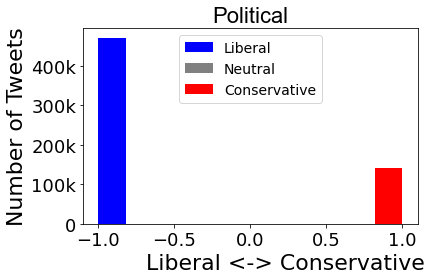

In [26]:
#df = df_tweetscov19.drop_duplicates(subset=['tweet_political_polarisation'])
df = df_tweetscov19
plot_histogram(df['tweet_political_polarisation'],'hist_tweetsCov19_political_polarized_tweets(alltweets)')

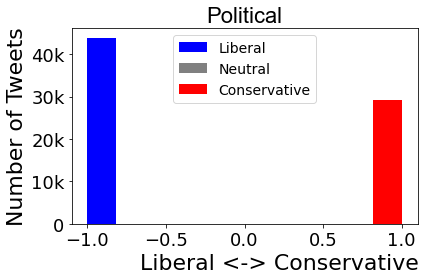

In [27]:
#df = df_tweetscov19_del.drop_duplicates(subset=['Username'])
df = df_tweetscov19_del
plot_histogram(df['tweet_political_polarisation'],'hist_tweetsCov19_political_polarized_tweets(deletedtweets)')

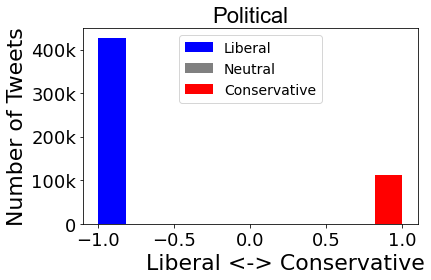

In [28]:
#df = df_tweetscov19_undel.drop_duplicates(subset=['Username'])
df = df_tweetscov19_undel
plot_histogram(df['tweet_political_polarisation'],'hist_tweetsCov19_political_polarized_tweets(nondeletedtweets)')

----

***

# Heatmap
## Reputation-Polarisierung

***

***

In [29]:
import plotly.express as px
import plotly.graph_objs as go
import plotly.offline as pyo

def density_hp(df, title, x, y, color):
    fig = px.density_heatmap(df, x=x, y=y, nbinsx=20, nbinsy=20, color_continuous_scale=color)
    fig.layout.height = 500
    fig.layout.width = 600
    fig.update_layout(
        title= dict(
            text= "Political",
            y=0.95,
            x=0.45,
            xanchor= 'center',
            yanchor= 'top'),
        titlefont = dict(
             family = 'Arial, sans-serif',
             size = 32,
             color = 'Black'
              ),
        xaxis = dict(
            title='Liberal  <->  Conservative',
            
            tickmode = 'linear',
            tickformat=".1f",
            dtick = 0.5,
            tickfont = dict(
            family = 'Arial, sans-serif',
            size = 28,
            color = 'black'
              ),
            titlefont = dict(
             family = 'Arial, sans-serif',
             size = 32,
             color = 'Black'
              ),
            ),
        yaxis = dict(
            tickmode = 'linear',
            tickformat=".1f",
            dtick = 0.5,
            tickfont = dict(
            family = 'Arial, sans-serif',
            size =28,
            color = 'black'
              ),
        titlefont = dict(
             family = 'Arial, sans-serif',
             size = 32,
             color = 'Black'
              ),
            ),
        coloraxis_colorbar=dict(
            title="Tweets",
            thicknessmode="pixels",
            titlefont = dict(
             family = 'Arial, sans-serif',
             size = 32,
             color = 'Black'
              ),
            tickfont = dict(
            family = 'Arial, sans-serif',
            size = 25,
            color = 'black'
              ),
            ),


        )

    #fig.show()
    pyo.plot(fig, filename=title+".html")
#     fig.write_image('../plots/heatmaps/'+title+'.pdf')

In [30]:
df = df_tweetscov19[['is_deleted', 'user_political_polarisation', 'Reputation']]

df_del =  df[df['is_deleted']==True]
df_undel = df[df['is_deleted']==False]

In [31]:
df_undel.shape

(538652, 3)

In [32]:
df_del.shape

(73183, 3)

In [33]:
density_hp(df,'density_hp_political_polarisation_tweetscov19_alltweets' ,'user_political_polarisation', 'Reputation', 'Blues')

In [34]:
density_hp(df_del,'density_hp_political_polarisation_tweetscov19_deleted' ,'user_political_polarisation', 'Reputation', 'Blues')

In [35]:
density_hp(df_undel,'density_hp_political_polarisation_tweetscov19_nondeleted' ,'user_political_polarisation', 'Reputation', 'Blues')

***

***

# TweetKB
## KDE-Plot

***

In [39]:
path = '../data/tweetskb_political_polarized_users_with_atleast_one_polarized_domain_v2.tsv'

df_tweetskb_political_polarized_and_neutralized = pd.read_csv(path, sep='\t', error_bad_lines=False, names=['Username', 'Number_of_liberals', 'Number_of_conservatives', 'Sum_polarised_domains', 'politic'])

print('Shape :', df_tweetskb_political_polarized_and_neutralized.shape)
df_tweetskb_political_polarized_and_neutralized.head()

Shape : (48518, 5)


,Username,Number_of_liberals,Number_of_conservatives,Sum_polarised_domains,politic
0,0000Condor,-1,0,1,-1.0000
1,007AliSohrab,-1,1,2,0.0000
2,007newsandviews,-1,0,1,-1.0000
3,007plus100,-1,0,1,-1.0000
4,00Mit89,0,1,1,1.0000


In [40]:
path = '../data/TweetsKB_alltweets_reputation_deletionratio.tsv'

df_tweetskb_alltweets_reputation_deletionratio = pd.read_csv(path, sep='\t', error_bad_lines=False, names=['Tweet_Id', 'Username', 'Followers', 'Friends', 'is_deleted', 'num_posted', 'num_del', 'Deletionratio',  'Reputation'])

print('Form :', df_tweetskb_alltweets_reputation_deletionratio.shape)
df_tweetskb_alltweets_reputation_deletionratio.head()

Form : (9409841, 9)


,Tweet_Id,Username,Followers,Friends,is_deleted,num_posted,num_del,Deletionratio,Reputation
0,1178791636039589889,DCComics,3349606,563,False,42,0,0.0000,0.9998
1,1179833467644850176,DCComics,3351904,563,False,42,0,0.0000,0.9998
2,1180490470125965313,DCComics,3354879,563,False,42,0,0.0000,0.9998
3,1187059882534400000,DCComics,3369484,562,False,42,0,0.0000,0.9998
4,1190311668141580288,DCComics,3376154,564,False,42,0,0.0000,0.9998


In [41]:
df_tweetskb_alltweets_reputation_deletionratio = df_tweetskb_alltweets_reputation_deletionratio[['Username', 'is_deleted', 'Reputation']]
df_tweetskb_political_polarized_and_neutralized = df_tweetskb_political_polarized_and_neutralized[['Username', 'politic']]

df_tweetskb = pd.merge(df_tweetskb_alltweets_reputation_deletionratio, df_tweetskb_political_polarized_and_neutralized, on='Username', how='inner')
print('Form :', df_tweetskb.shape)
df_tweetskb.head()

Form : (410302, 4)


,Username,is_deleted,Reputation,politic
0,dailytelegraph,False,0.9291,1.0000
1,dailytelegraph,False,0.9291,1.0000
2,dailytelegraph,False,0.9291,1.0000
3,dailytelegraph,False,0.9291,1.0000
4,dailytelegraph,False,0.9291,1.0000


------------

In [44]:
pfad = '../data/tweetskb_domainsLR_political_polarized_tweets.tsv'

df_tweetskb = pd.read_csv(pfad, sep='\t', error_bad_lines=False, names=['Tweet_Id', 'Username', 'is_deleted', 'Domains', 'Liberal_domains', 'Number_of_liberals', 'Conservative_domains', 'Number_of_conservatives', 'tweet_political_polarisation'])

print('Shape :', df_tweetskb.shape)
df_tweetskb.head()

Shape : (133676, 9)


,Tweet_Id,Username,is_deleted,Domains,Liberal_domains,Number_of_liberals,Conservative_domains,Number_of_conservatives,tweet_political_polarisation
0,1178791665735208960,dailytelegraph,False,dailytelegraph.com.au,[],0,['dailytelegraph.com.au'],1,1.0000
1,1178792395573383168,dailyherald,False,dailyherald.com,[],0,['dailyherald.com'],1,1.0000
2,1178792740664102913,ajc,False,ajc.com,['ajc.com'],-1,[],0,-1.0000
3,1178793142134292481,JuanchoS,False,msn.com,['msn.com'],-1,[],0,-1.0000
4,1178793578350497806,MichaeDemitre,False,rawstory.com,['rawstory.com'],-1,[],0,-1.0000


***

In [6]:
path = '../data/df_tweetskb_october2019_political_polarized_users.tsv'
October = pd.read_csv(path, sep='\t', error_bad_lines=False, names=['Username', 'Number_of_liberals', 'Number_of_conservatives', 'Sum_polarised_domains', 'politic'])
print('October: ', '{0:.3g}'.format(October.politic.mean()))

path = '../data/df_tweetskb_november2019_political_polarized_users.tsv'
November = pd.read_csv(path, sep='\t', error_bad_lines=False, names=['Username', 'Number_of_liberals', 'Number_of_conservatives', 'Sum_polarised_domains', 'politic'])
print('November: ', '{0:.3g}'.format(November.politic.mean()))

path = '../data/df_tweetskb_december2019_political_polarized_users.tsv'
December = pd.read_csv(path, sep='\t', error_bad_lines=False, names=['Username', 'Number_of_liberals', 'Number_of_conservatives', 'Sum_polarised_domains', 'politic'])
print('December: ', '{0:.3g}'.format(December.politic.mean()))

path = '../data/df_tweetskb_januar2020_political_polarized_users.tsv'
Januar = pd.read_csv(path, sep='\t', error_bad_lines=False, names=['Username', 'Number_of_liberals', 'Number_of_conservatives', 'Sum_polarised_domains', 'politic'])
print('Januar: ', '{0:.3g}'.format(Januar.politic.mean()))

path = '../data/df_tweetskb_februar2020_political_polarized_users.tsv'
Februar = pd.read_csv(path, sep='\t', error_bad_lines=False, names=['Username', 'Number_of_liberals', 'Number_of_conservatives', 'Sum_polarised_domains', 'politic'])
print('February: ', '{0:.3g}'.format(Februar.politic.mean()))

path = '../data/df_tweetskb_maerz2020_political_polarized_users.tsv'
March = pd.read_csv(path, sep='\t', error_bad_lines=False, names=['Username', 'Number_of_liberals', 'Number_of_conservatives', 'Sum_polarised_domains', 'politic'])
print('March: ', '{0:.3g}'.format(March.politic.mean()))

path = '../data/df_tweetskb_April2020_political_polarized_users.tsv'
April = pd.read_csv(path, sep='\t', error_bad_lines=False, names=['Username', 'Number_of_liberals', 'Number_of_conservatives', 'Sum_polarised_domains', 'politic'])
print('April: ', '{0:.3g}'.format(April.politic.mean()))

path = '../data/df_tweetskb_mai2020_political_polarized_users.tsv'
Mai = pd.read_csv(path, sep='\t', error_bad_lines=False, names=['Username', 'Number_of_liberals', 'Number_of_conservatives', 'Sum_polarised_domains', 'politic'])
print('Mai: ', '{0:.3g}'.format(Mai.politic.mean()))


October:  -0.507
November:  -0.503
December:  -0.494
Januar:  -0.5
February:  -0.485
March:  -0.554
April:  -0.515
Mai:  -0.496


***

In [42]:
print('Alle Users:', df_tweetskb.Username.unique().size)


Alle Users: 48518


In [43]:
# df_tweetskb = df_tweetskb[df_tweetskb['politic'] != 0]

# print('Shape: ', df_tweetskb.shape)
# df_tweetskb.head()

In [44]:
df_tweetskb_del = df_tweetskb[df_tweetskb['is_deleted']==True]
df_tweetskb_undel = df_tweetskb[df_tweetskb['is_deleted']==False]

In [45]:
print('Deleted Tweets:', df_tweetskb_del.shape)
print('Non-deleted Tweets:', df_tweetskb_undel.shape)


Deleted Tweets: (92958, 4)
Non-deleted Tweets: (317344, 4)


In [46]:
print('Alle Users:', df_tweetskb.Username.unique().size)

df = df_tweetskb[df_tweetskb['politic']>0]
print('Alle kon. Users in gesammten Tweets:', df.Username.unique().size)
print('Tweets of kon. Users in gesammten Tweets:', df.shape[0])

df = df_tweetskb[df_tweetskb['politic']<0]
print('Alle lib. Users in gesammten Tweets:', df.Username.unique().size)
print('Tweets of lib. Users in gesammten Tweets:', df.shape[0])

Alle Users: 48518
Alle kon. Users in gesammten Tweets: 15854
Tweets of kon. Users in gesammten Tweets: 140536
Alle lib. Users in gesammten Tweets: 31518
Tweets of lib. Users in gesammten Tweets: 250505


In [47]:
print('Alle Users:', df_tweetskb_del.Username.unique().size)

df = df_tweetskb_del[df_tweetskb_del['politic']>0]
print('Alle kon. Users in gelöschten Tweets:', df.Username.unique().size)
print('Tweets of kon. Users in gesammten Tweets:', df.shape[0])

df = df_tweetskb_del[df_tweetskb_del['politic']<0]
print('Alle lib. Users in gelöschten Tweets:', df.Username.unique().size)
print('Tweets of lib. Users in gesammten Tweets:', df.shape[0])


Alle Users: 11685
Alle kon. Users in gelöschten Tweets: 4695
Tweets of kon. Users in gesammten Tweets: 46523
Alle lib. Users in gelöschten Tweets: 6607
Tweets of lib. Users in gesammten Tweets: 41305


In [48]:
print('Alle Users:', df_tweetskb_undel.Username.unique().size)

df = df_tweetskb_undel[df_tweetskb_undel['politic']>0]
print('Alle kon. Users in nicht gelöschten Tweets:', df.Username.unique().size)
print('Tweets of kon. Users in gesammten Tweets:', df.shape[0])

df = df_tweetskb_undel[df_tweetskb_undel['politic']<0]
print('Alle lib. Users in nicht gelöschten Tweets:', df.Username.unique().size)
print('Tweets of lib. Users in gesammten Tweets:', df.shape[0])


Alle Users: 40084
Alle kon. Users in nicht gelöschten Tweets: 12146
Tweets of kon. Users in gesammten Tweets: 94013
Alle lib. Users in nicht gelöschten Tweets: 27029
Tweets of lib. Users in gesammten Tweets: 209200


In [49]:
df_tweetskb_neutral = df_tweetskb[df_tweetskb['politic']==0]
print('Alle Users:', df_tweetskb_neutral.Username.unique().size)

df = df_tweetskb_del[df_tweetskb_del['politic']==0]
print('Alle neutral Users in gelöschten Tweets:', df.Username.unique().size)
print('Tweets of neutral Users in gelöschten Tweets:', df.shape[0])

df = df_tweetskb_undel[df_tweetskb_undel['politic']==0]
print('Alle neutral Users in nicht gelöschten Tweets:', df.Username.unique().size)
print('Tweets of neutral Users in nicht gelöschten Tweets:', df.shape[0])

Alle Users: 1146
Alle neutral Users in gelöschten Tweets: 383
Tweets of neutral Users in gelöschten Tweets: 5130
Alle neutral Users in nicht gelöschten Tweets: 909
Tweets of neutral Users in nicht gelöschten Tweets: 14131


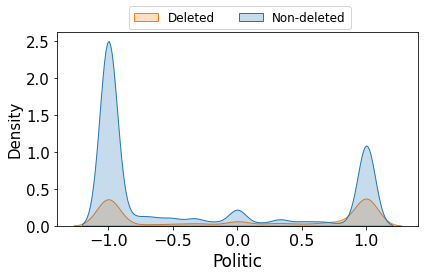

In [50]:
df = df_tweetskb[['is_deleted', 'politic']]
plot_kdeplot_v1(df, 'is_deleted','politic' ,'Politic' ,'TweetsCov19', 'kdeplot_tweetskb_politic_alltweets_conditionaldistribution')

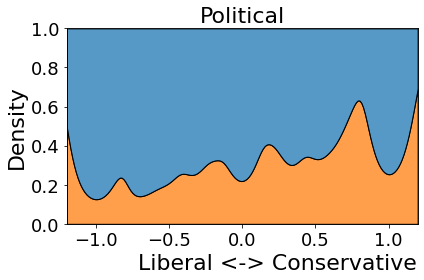

In [51]:
df = df_tweetskb[['is_deleted', 'politic']]
plot_kdeplot_v2(df, 'is_deleted','politic' ,'          Liberal <-> Conservative' ,'TweetsCov19', 'kdeplot_tweetskb_politic_alltweets_Normalizethestackeddistribution')

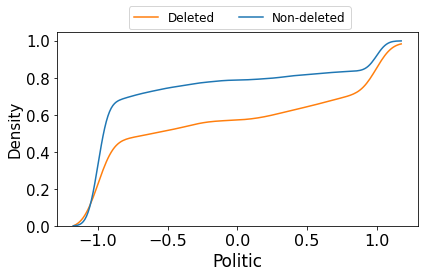

In [101]:
df = df_tweetskb[['is_deleted', 'politic']]
plot_kdeplot_v3(df, 'is_deleted','politic' ,'Politic' ,'TweetsCov19', 'kdeplot_tweetskb_politic_alltweets_cumulativedistributionfunction')

# Histogram

***

***

In [45]:
def thousands(x, pos):
    if x <1000 :
        return '{:1.0f}'.format(x*1e-3)
    """The two args are the value and tick position."""
    return '{:1.0f}k'.format(x*1e-3)

def plot_histogram_kb(df, titel):
    #figure(figsize=(8, 6), dpi=80)
    
    fig, ax = plt.subplots()
    colors = ['b', 'r']
    #labels = ['Liberale', 'konservativ']
    
    N, bins, patches = ax.hist(df, bins=11, color = 'gray')
    patches[5].set_label('Neutral')
    patches[5].set_facecolor('gray')
    for i in range(0,5):
        patches[i].set_facecolor('b')
    patches[1].set_label('Liberal')
    for i in range(6,len(patches)):
        patches[i].set_facecolor('r')
    patches[9].set_label('Conservative')
    
          
    ax.tick_params(axis='x', which='major', labelsize=18)
    ax.tick_params(axis='y', which='major', labelsize=18)

    figsize=(8, 6)
    ax.set_title('Political', fontsize=22)
    ax.set_ylabel('Number of Tweets', fontsize=22)
    ax.set_xlabel(xlabel='          Liberal <-> Conservative' , fontsize=22)
    ax.yaxis.set_major_formatter(thousands)

    #f = ticker.ScalarFormatter(useOffset=False, useMathText=True)
    #g = lambda x,pos : "${}$".format(f._formatSciNotation('%1.10e' % x))
    #ax.yaxis.set_major_formatter(ticker.FuncFormatter(g))

    #plt.title('Political polarization', fontsize=18)
    plt.legend( fontsize=14)
    plt.tight_layout()
    plt.savefig('../plots/'+titel+'.pdf')

In [46]:
df_tweetskb_del = df_tweetskb[df_tweetskb['is_deleted']==True]
df_tweetskb_undel = df_tweetskb[df_tweetskb['is_deleted']==False]

In [47]:
df_tweetskb.describe()

,Tweet_Id,Number_of_liberals,Number_of_conservatives,tweet_political_polarisation
count,133676.0000,133676.0000,133676.0000,133676.0000
mean,1224523106819330048.0000,-0.7563,0.2495,-0.5048
std,25825512773752588.0000,0.4397,0.4371,0.8630
min,1178756354229575680.0000,-5.0000,0.0000,-1.0000
25%,1201884184186289152.0000,-1.0000,0.0000,-1.0000
50%,1225821280636712960.0000,-1.0000,0.0000,-1.0000
75%,1247016435906282496.0000,-1.0000,0.0000,-1.0000
max,1267214246229598208.0000,0.0000,6.0000,1.0000


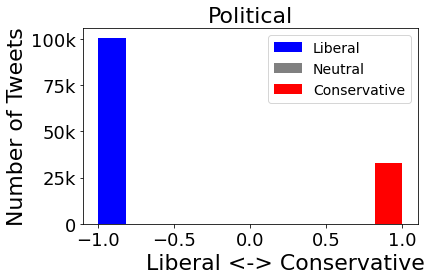

In [60]:
#All Tweets
#df = df_tweetskb.drop_duplicates(subset=['Username'])
df = df_tweetskb
plot_histogram_kb(df['tweet_political_polarisation'],'hist_tweetsKB_political_polarized_tweets(alltweets)')

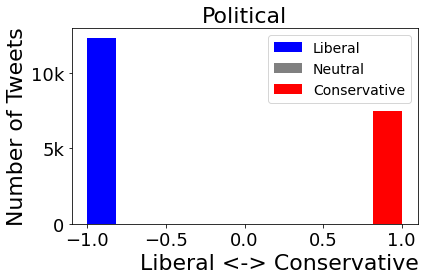

In [61]:
#df = df_tweetskb_del.drop_duplicates(subset=['Username'])
df = df_tweetskb_del
plot_histogram_kb(df['tweet_political_polarisation'],'hist_tweetsKB_political_polarized_tweets(deletedtweets)')

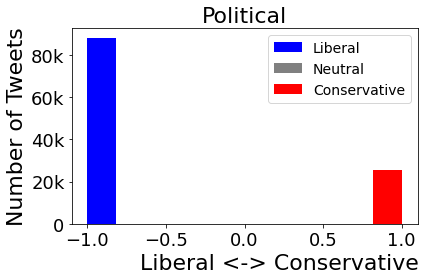

In [63]:
df = df_tweetskb_undel.drop_duplicates(subset=['Username'])
df = df_tweetskb_undel
plot_histogram_kb(df['tweet_political_polarisation'],'hist_tweetsKB_political_polarized_tweets(nondeletedtweets)')

***

# Heatmap
### Reputation-Polarisierung

***

In [24]:
df = df_tweetskb[['is_deleted', 'politic', 'Reputation']]

df_del =  df[df['is_deleted']==True]
df_undel = df[df['is_deleted']==False]

In [25]:
density_hp(df,'density_hp_political_polarisation_tweetskb_alltweets' ,'politic', 'Reputation', 'Blues')

In [26]:
density_hp(df_del,'density_hp_political_polarisation_tweetskb_deleted' ,'politic', 'Reputation', 'Blues')

In [27]:
density_hp(df_undel,'density_hp_political_polarisation_tweetskb_nondeleted' ,'politic', 'Reputation', 'Blues')